In [ ]:

# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

In [ ]:
data=pd.read_excel('customer_churn_large_dataset.xlsx')
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
#Backup file
data_BK = data.copy()

In [ ]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [ ]:
# Displaying Duplicate values with in dataset training
train_dup = data[data.duplicated(keep='last')]
train_dup

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


In [ ]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
Churn_counts = data.Churn.value_counts()
print("class 0:",Churn_counts[0])
print("class 1:",Churn_counts[1])

class 0: 50221
class 1: 49779


In [ ]:
print('Proportion:', round(Churn_counts[0] / Churn_counts[1], 2), ': 1')   #proportion--- major/minor
print('Total Churn records:', len(data))

Proportion: 1.01 : 1
Total Churn records: 100000


*since the proportion is less than 10% so the given data is balanced*

# EDA

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot


Layout({
    'autosize': False,
    'font': {'color': 'white', 'family': 'Arial Black', 'size': 12},
    'height': 500,
    'title': {'font': {'color': 'black', 'family': 'Courier New, monospace', 'size': 14},
              'text': 'Distribution of Gender column'},
    'width': 400,
    'xaxis': {'tickfont': {'color': 'black', 'family': 'Courier New, monospace', 'size': 14}},
    'yaxis': {'tickfont': {'color': 'black', 'family': 'Courier New, monospace', 'size': 14},
              'title': {'font': {'color': 'black', 'size': 14}, 'text': 'Percentage'}}
})

In [ ]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=400, # height of the figure in pixels
        height=500, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font
        titlefont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects
        xaxis=dict(
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the y axis
            color='black' # color of the font
            )
        ),
        font = dict(
            family='Arial Black', # font family
            color = "white",# color of the font
            size = 12 # size of the font displayed on the bar
                )
        )
    return layout_bar

def plot_bar(col_name,data):
    # create a table with value counts
    temp = data[col_name].value_counts()
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index, # x axis values
            y=np.round(temp.values/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round((temp.values/temp.values.sum())*100,4)],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0A9FF9'),)] # change color of the bar

    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)

def plot_bi_variant_target_within(hr_data,feature,target,req):
    df_target_feature = hr_data.groupby([feature,target]).size().reset_index()
    df_target_feature.columns = [feature,target,'Count']
    df_target_feature=df_target_feature.merge(df_target_feature.groupby(feature)['Count'].sum().reset_index().rename(columns={'Count':'feature_count'}),on=feature,how='left')

    df_target_feature=df_target_feature.merge(df_target_feature.groupby(target)['Count'].sum().reset_index().rename(columns={'Count':'target_count'}),on=target,how='left')


    df_target_feature['Count_ratio_feature']=(df_target_feature['feature_count']/df_target_feature['feature_count'])*100

    df_target_feature['Count_ratio_target']=(df_target_feature['Count']/df_target_feature['target_count'])*100

    data=[]
    if req=='percentage':
        for i in df_target_feature[target].unique():
            trace=go.Bar(x=df_target_feature[df_target_feature[target]==i][feature],
                         y=df_target_feature[df_target_feature[target]==i]['Count_ratio_target'],
                         text=np.round(df_target_feature[df_target_feature[target]==i]['Count_ratio_target'],2),
                         textposition = 'auto',name  = target+" ({})".format(str(i)))
            data.append(trace)
    else:
        for i in df_target_feature[target].unique():
            trace=go.Bar(x=df_target_feature[df_target_feature[target]==i][feature],
                         y=df_target_feature[df_target_feature[target]==i]['Count'],
                         text=np.round(df_target_feature[df_target_feature[target]==i]['Count'],2),
                         textposition = 'auto',name = i)
            data.append(trace)


    layout = go.Layout(width = 600,height = 500,title = feature +' and '+target+' '+req,colorway=['#E84535','#6E94F7']   , xaxis=dict(
            title=feature,
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=10, # size of ticks displayed on the x axis
            color='black'  # color of the font
        )))

    fig = go.Figure(data=data, layout=layout)
    return iplot(fig)

def stacked_bar_chart(data_st,feature,target):
    # creating random data through randomint
    # function of numpy.random
    np.random.seed(42)

    x = data_st[feature].index

    plot = px.Figure(data=[

    go.Bar(
    name = feature,
    x = x,
    y = (data_st[target]*100).values,
        text=[ str(round(x,2))+'%' for x in (data_st[target]*100).values]
    )
    ,
        go.Bar(
    name = target,
    x = x,
    y = (data_st[feature]*100).values,
        text=[ str(round(x,2))+'%' for x in (data_st[feature]*100).values]

    )
    ])

    plot.update_layout(barmode='stack',width=600)
    plot.show()

def scatter_cont(data,feature1,feature2):
    trace = go.Scatter(x=data[feature1] ,
                      y= data[feature2],
                      name = feature1+' and '+feature2,
                      mode= 'markers')
    data = [trace]
    layout = go.Layout(title = feature1+' and '+feature2+' distribution',
                      xaxis = dict(title = feature1),
                      yaxis = dict(title = feature2))
    fig = go.Figure(data=data,layout=layout)
    iplot(fig)

def multivariate_box(feature1,feature2,target,txt):
    data = []
    for i in np.sort(data[feature2].unique()):
            data.append(go.Box(y = data[feature1][data[feature2]==i][data[target]=='Yes'],
                               marker = dict(
            color = 'royalblue' ,
        ),
                               name = feature2+"({})- Yes".format(str(i))))
            data.append(go.Box(y = data[feature1][data[feature2]==i][data[target]=='No'],
                               marker = dict(
            color = '#CC0E1D',
        ),
                               name = feature2+"({})- No".format(str(i))))

    layout = go.Layout(
    autosize=False, # auto size the graph? use False if you are specifying the height and width
    width=700, # height of the figure in pixels
    height=500, # height of the figure in pixels
    title = "Boxplot of {} column based on {} ".format(feature1,feature2), # title of the figure
    # more granular control on the title font
        titlefont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects
        xaxis=dict(
            title=txt,
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=10, # size of ticks displayed on the x axis
            color='black'  # color of the font
        )
    ),
    yaxis=dict(
    #         range=[0,100],
        title=feature1,
        titlefont=dict(
            size=14,
            color='black'
        ),
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the y axis
            color='black' # color of the font
        )
    ),
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [ ]:
labels = ['Churn', 'Not Churn']
values = data['Churn'].value_counts()
colors = ['darkblue', 'royalblue']


trace = go.Pie(labels=labels, values=values, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
layout = go.Layout(title = 'Percentage of Customer churn')
data2 = trace
fig = go.Figure(data= data2,layout=layout)
iplot(fig)

In [ ]:
plot_bar('Location',data)

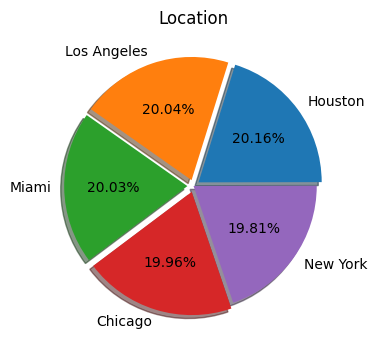

In [ ]:
def draw_pie_plot(column, title, **kvargs):
    explode = np.zeros(len(column.unique()))
    explode[:-1] = 0.05

    column.value_counts().plot(
        kind='pie',
        title=title,
        ylabel="",
        autopct='%1.2f%%',
        explode=explode,
        shadow=True,
        startangle=0.1,
        **kvargs
    )
draw_pie_plot(data['Location'], "Location", figsize=(4,4))
plt.show()

In [ ]:
plot_bar('Gender',data)

<Axes: >

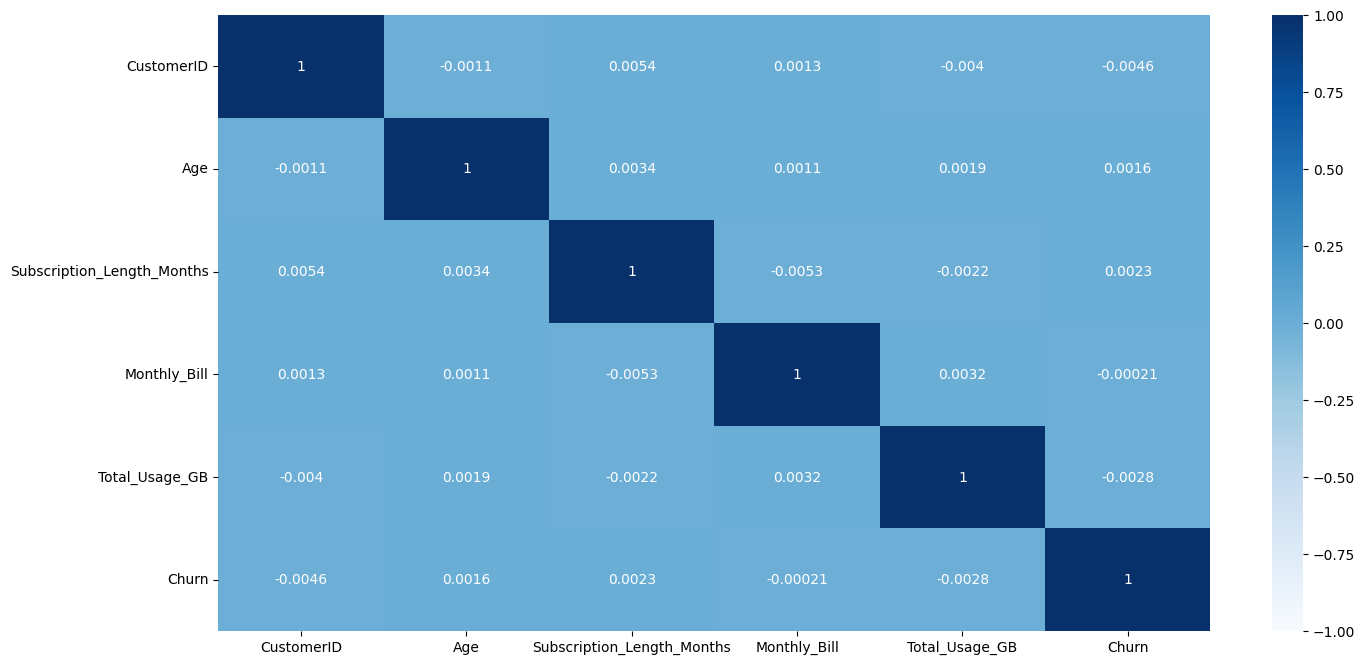

In [ ]:

# Making a heatmap for the numeric data to understand how they correlate in pairs
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,cmap="Blues", vmin=-1)


In [ ]:
def ploting_numerical_features(df,x,c):
    plt.figure(figsize=(15,5),facecolor='lightgrey')

    plt.suptitle(x,fontsize=16)
    plt.subplot(1,3,1)
    sns.histplot(df[x],color=c)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,y=x,color=c)
    plt.subplot(1,3,3)
    sns.kdeplot(df[x],color=c);

In [ ]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

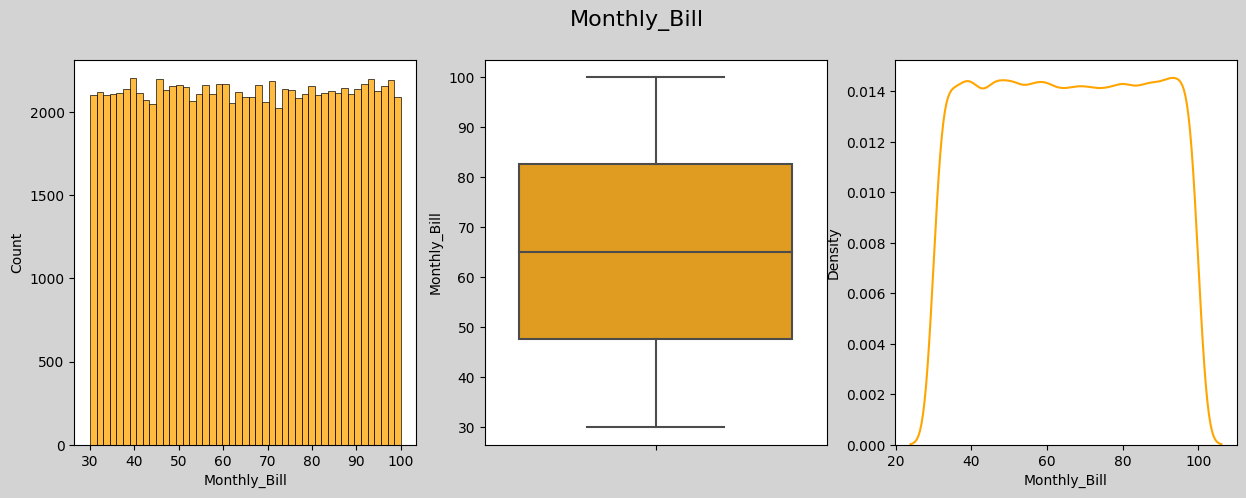

In [ ]:
ploting_numerical_features(data,'Monthly_Bill','orange')

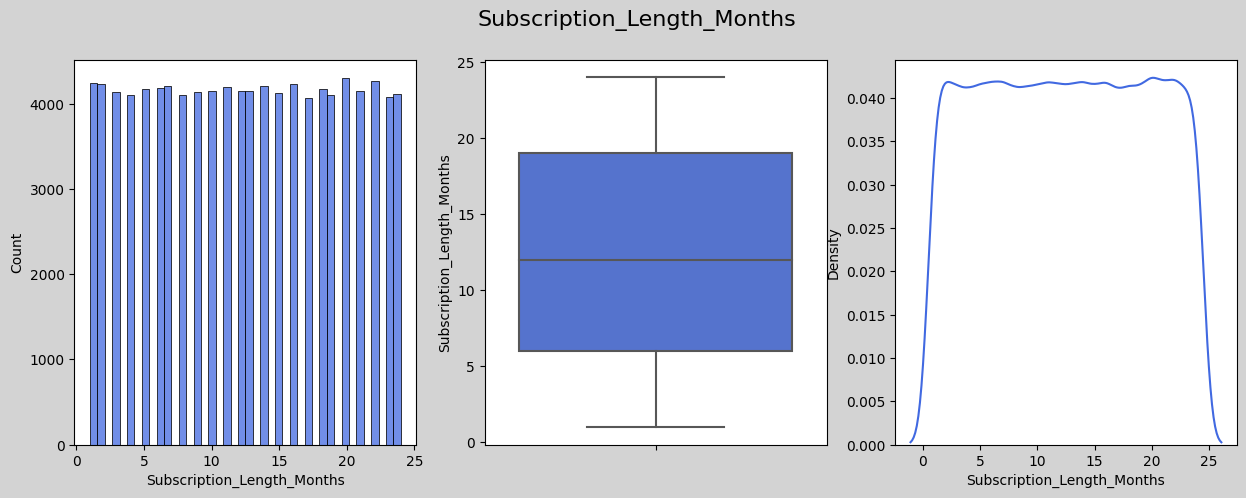

In [ ]:
ploting_numerical_features(data,'Subscription_Length_Months','RoyalBlue')

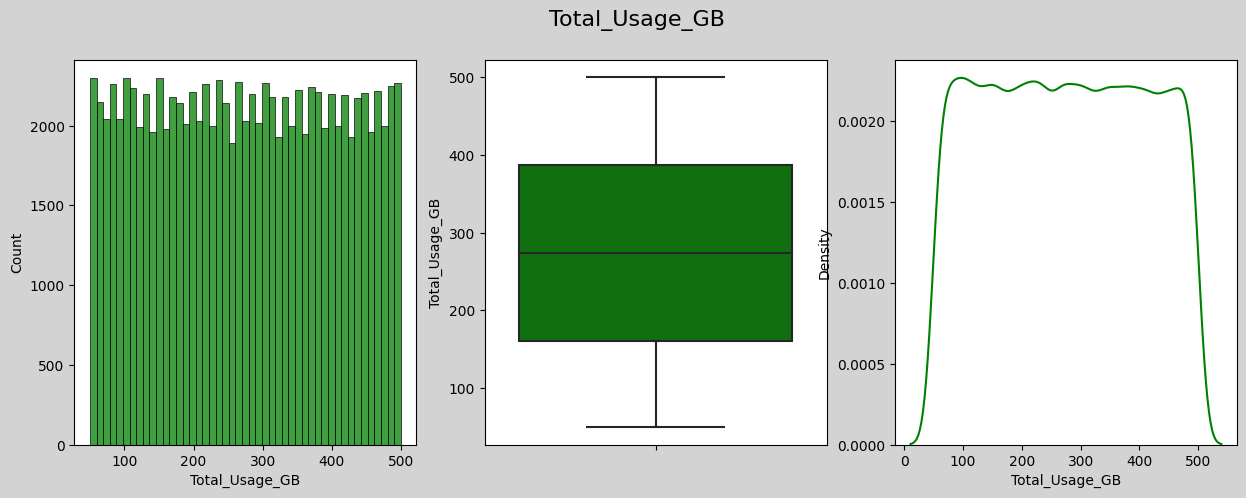

In [ ]:
ploting_numerical_features(data,'Total_Usage_GB','green')

# Bi Variate Analysis

In [ ]:
def plot_bi_variant_target_within(hr_data,feature,target,req):
    df_target_feature = hr_data.groupby([feature,target]).size().reset_index()
    df_target_feature.columns = [feature,target,'Count']
    df_target_feature=df_target_feature.merge(df_target_feature.groupby(feature)['Count'].sum().reset_index().rename(columns={'Count':'feature_count'}),on=feature,how='left')

    df_target_feature=df_target_feature.merge(df_target_feature.groupby(target)['Count'].sum().reset_index().rename(columns={'Count':'target_count'}),on=target,how='left')


    df_target_feature['Count_ratio_feature']=(df_target_feature['feature_count']/df_target_feature['feature_count'])*100

    df_target_feature['Count_ratio_target']=(df_target_feature['Count']/df_target_feature['target_count'])*100

    data=[]
    if req=='percentage':
        for i in df_target_feature[target].unique():
            trace=go.Bar(x=df_target_feature[df_target_feature[target]==i][feature],
                         y=df_target_feature[df_target_feature[target]==i]['Count_ratio_target'],
                         text=np.round(df_target_feature[df_target_feature[target]==i]['Count_ratio_target'],2),
                         textposition = 'auto',name  = target+" ({})".format(str(i)))
            data.append(trace)
    else:
        for i in df_target_feature[target].unique():
            trace=go.Bar(x=df_target_feature[df_target_feature[target]==i][feature],
                         y=df_target_feature[df_target_feature[target]==i]['Count'],
                         text=np.round(df_target_feature[df_target_feature[target]==i]['Count'],2),
                         textposition = 'auto',name = i)
            data.append(trace)


    layout = go.Layout(width = 600,height = 500,title = feature +' and '+target+' '+req,colorway=['#E84535','#6E94F7']   , xaxis=dict(
            title=feature,
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=10, # size of ticks displayed on the x axis
            color='black'  # color of the font
        )))

    fig = go.Figure(data=data, layout=layout)
    return iplot(fig)


In [ ]:
plot_bi_variant_target_within(data,'Gender','Churn','percentage')

In [ ]:
plot_bi_variant_target_within(data,'Location','Churn','percentage')

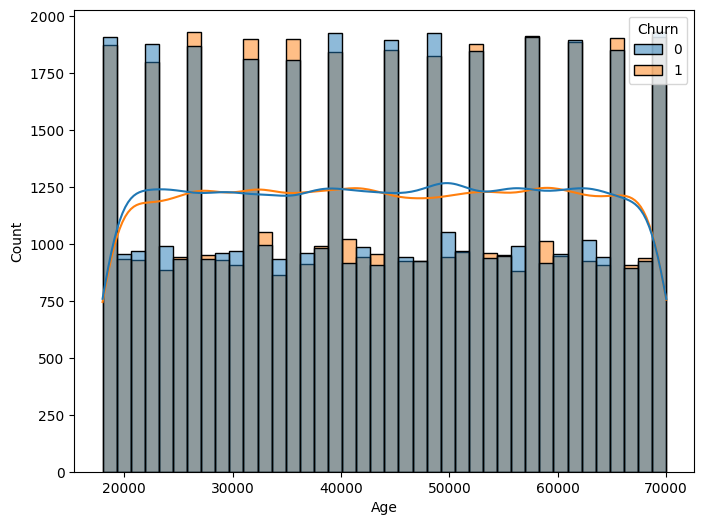

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x=data['Age']*1000,hue=data['Churn'],kde=True,bins=40)
plt.show()

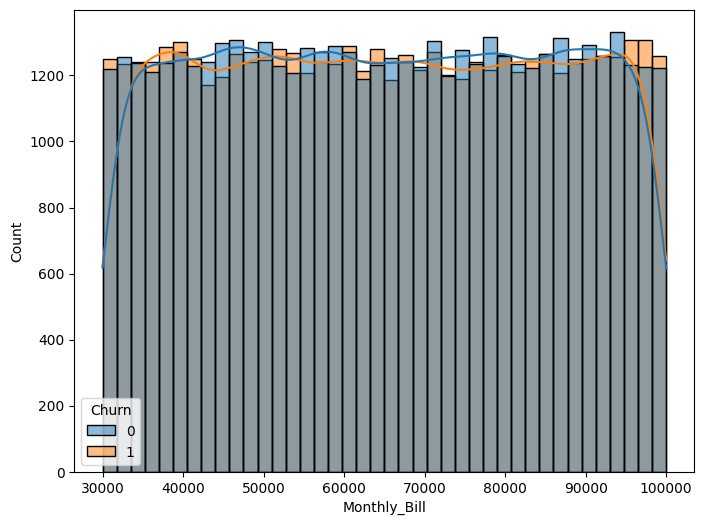

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x=data['Monthly_Bill']*1000,hue=data['Churn'],kde=True,bins=40)
plt.show()

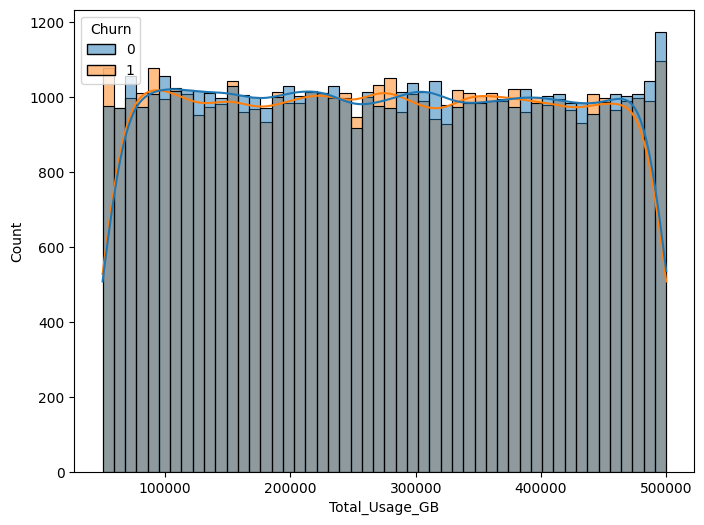

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x=data['Total_Usage_GB']*1000,hue=data['Churn'],kde=True,bins=50)
plt.show()

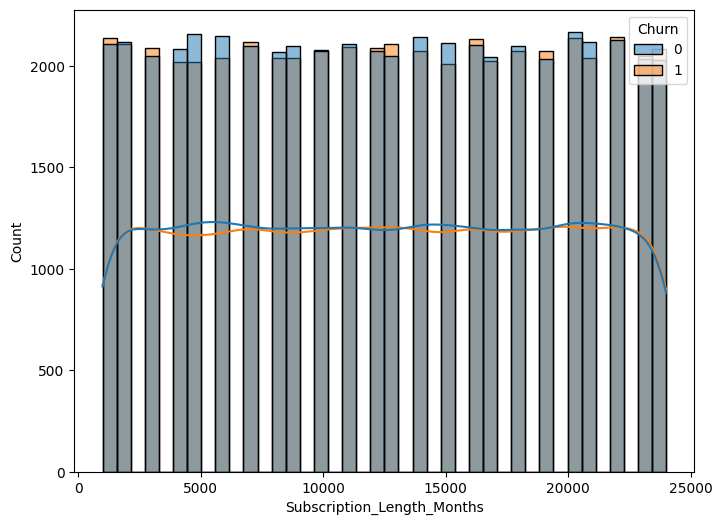

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x=data['Subscription_Length_Months']*1000,hue=data['Churn'],kde=True,bins=40)
plt.show()

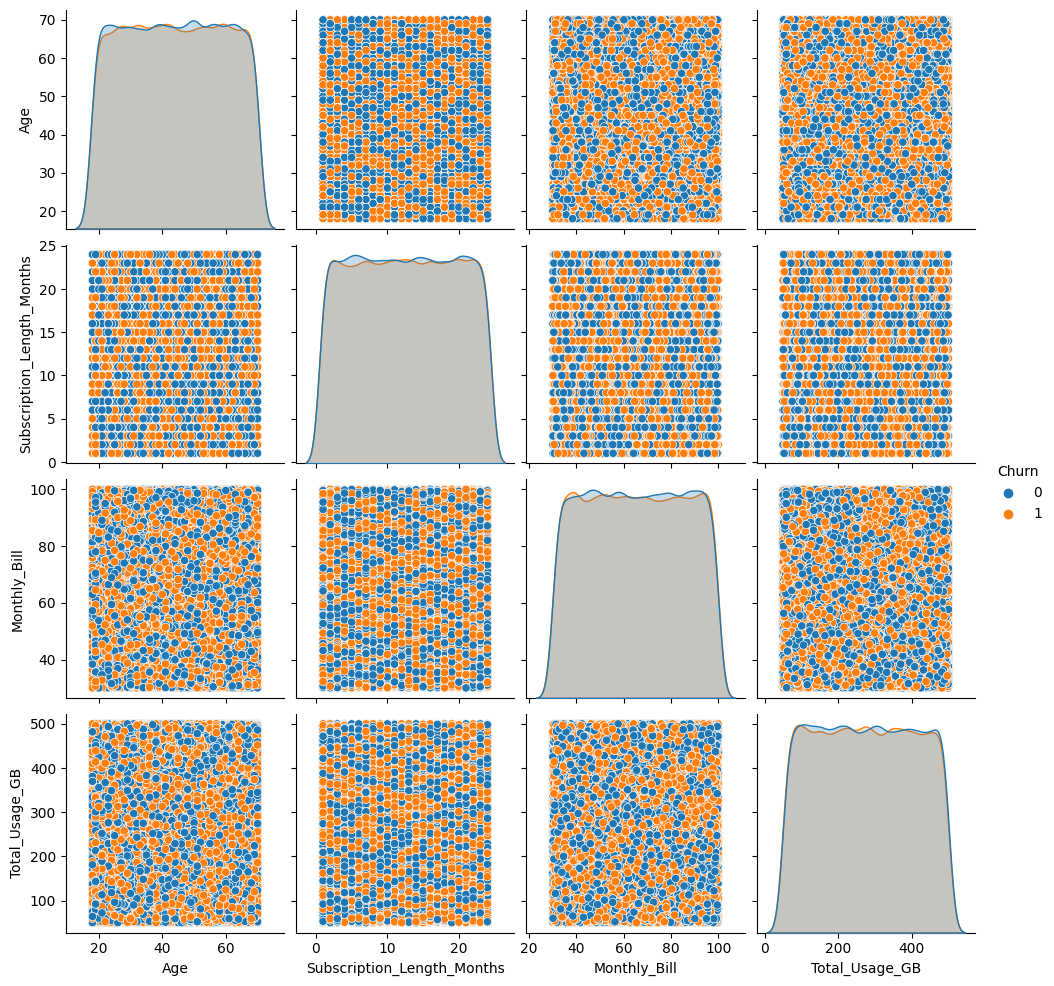

In [ ]:
sns.pairplot(data.drop(columns=['Name','CustomerID'],axis=1),hue='Churn', kind='scatter')
plt.show()

# Checking for Outliers

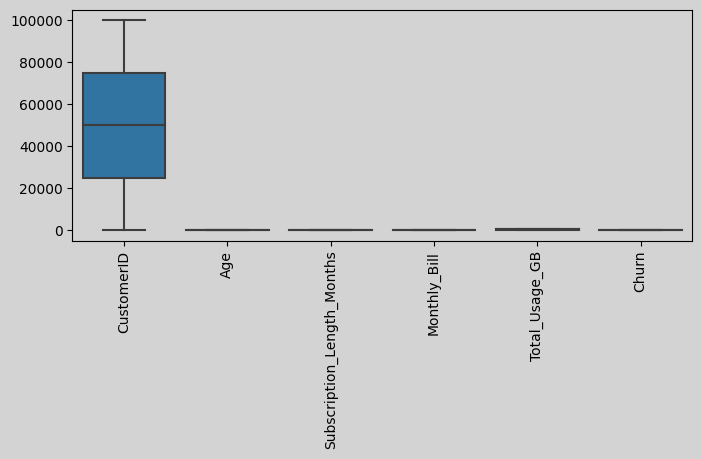

In [ ]:
plt.figure(figsize=(8,3),facecolor='lightgrey')
ax=plt.axes()
ax.set_facecolor('lightgrey')
sns.boxplot(data=data,ax=ax)
plt.xticks(rotation=90);

<Axes: >

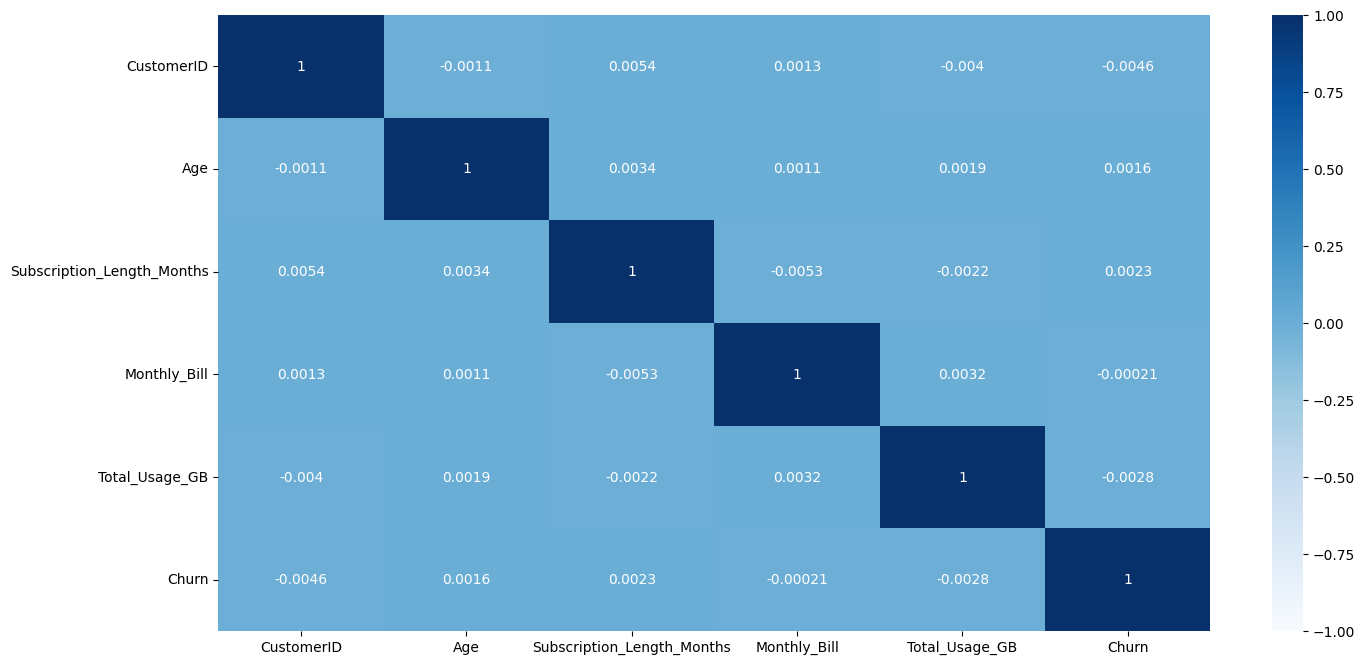

In [ ]:
# Making a heatmap for the numeric data to understand how they correlate in pairs
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,cmap="Blues", vmin=-1)

# Handling Missing Values

In [ ]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

# Encoding the data

In [ ]:
train = data.drop(['Name'],axis=1)
train.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,Male,Los Angeles,17,73.36,236,0
1,2,62,Female,New York,1,48.76,172,0
2,3,24,Female,Los Angeles,5,85.47,460,0
3,4,36,Female,Miami,3,97.94,297,1
4,5,46,Female,Miami,19,58.14,266,0


In [ ]:

l=[]
for i in train.columns:
    if(train[i].dtype=='object'):
        l.append(i)
l

['Gender', 'Location']

In [ ]:
for x in l:
    print(train[x].value_counts())
    print("............................")
    print(l)

Female    50216
Male      49784
Name: Gender, dtype: int64
............................
['Gender', 'Location']
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64
............................
['Gender', 'Location']


In [ ]:
import pandas as pd
# Perform one-hot encoding
df_encoded = pd.get_dummies(data, columns=['Gender', 'Location'])
# Replace original columns with encoded data
train = df_encoded

# Scaling

In [ ]:
cols=['Age','Subscription_Length_Months','Monthly_Bill']
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

train[cols] = mmscaler.fit_transform(train[cols])
train = pd.DataFrame(train)

# x_test[cols] = mmscaler.fit_transform(x_test[cols])
# x_test = pd.DataFrame(x_test)

# Splitting the Data

In [ ]:
train.columns

Index(['CustomerID', 'Name', 'Age', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn', 'Gender_Female',
       'Gender_Male', 'Location_Chicago', 'Location_Houston',
       'Location_Los Angeles', 'Location_Miami', 'Location_New York'],
      dtype='object')

In [ ]:
x=train.drop(['Churn','CustomerID','Name'],axis=1)
y=train['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=42,test_size=0.2, shuffle=True)

# Training the model without Hyper parameters and with all parameters

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.metrics import accuracy_score

Model Name:  LogisticRegression()
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      9921
           0       0.50      1.00      0.67     10079

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.34     20000
weighted avg       0.25      0.50      0.34     20000

Accuracy : 50.4 %
roc_auc_score: 0.5


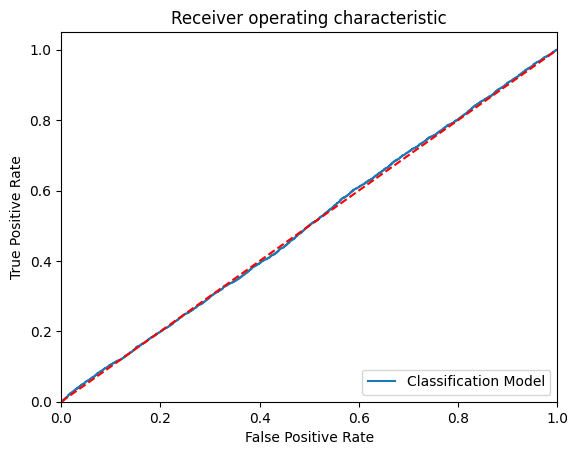

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.50      0.50      9921
           0       0.50      0.50      0.50     10079

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Accuracy : 50.0 %
roc_auc_score: 0.5


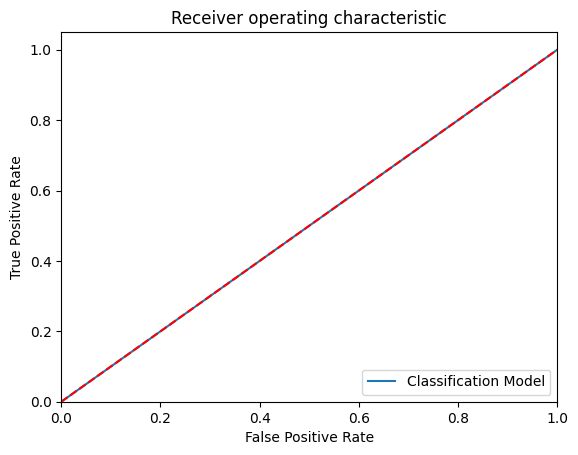

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.48      0.48      9921
           0       0.50      0.51      0.51     10079

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000

Accuracy : 49.4 %
roc_auc_score: 0.494


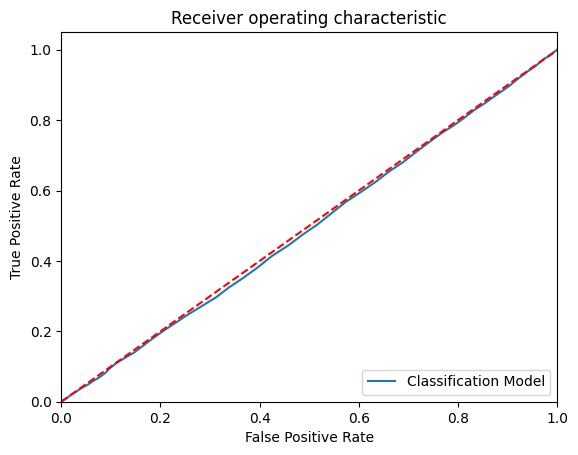

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.48      0.48      9921
           0       0.50      0.51      0.51     10079

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Accuracy : 49.5 %
roc_auc_score: 0.495


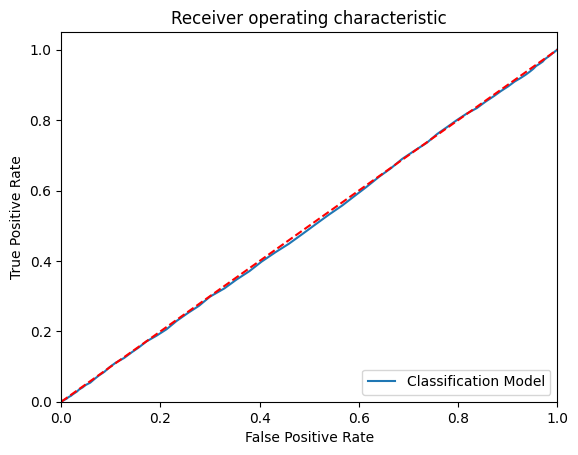

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=10)
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.36      0.42      9921
           0       0.50      0.63      0.56     10079

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000

Accuracy : 49.6 %
roc_auc_score: 0.495


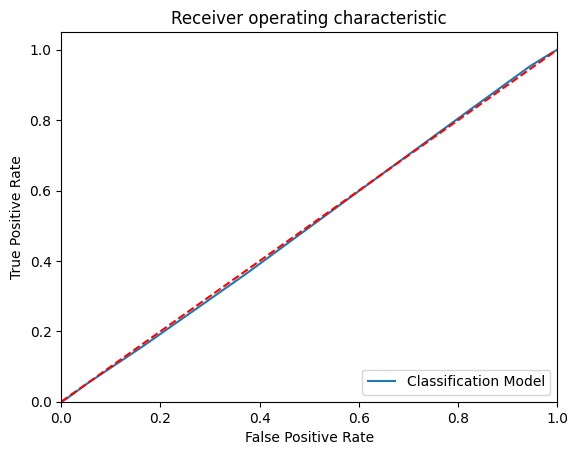

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.40      0.44      9921
           0       0.51      0.61      0.55     10079

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Accuracy : 50.5 %
roc_auc_score: 0.504


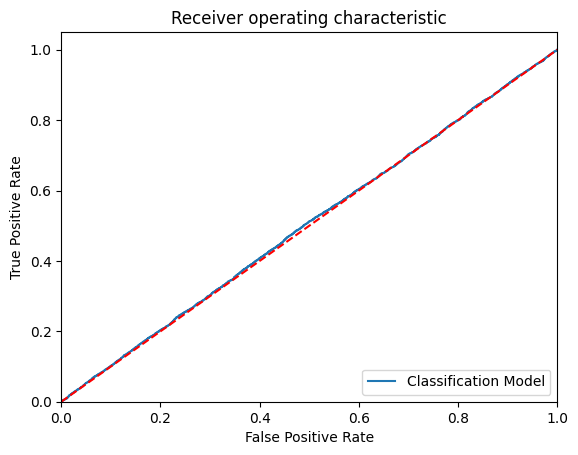

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.49      0.49      992

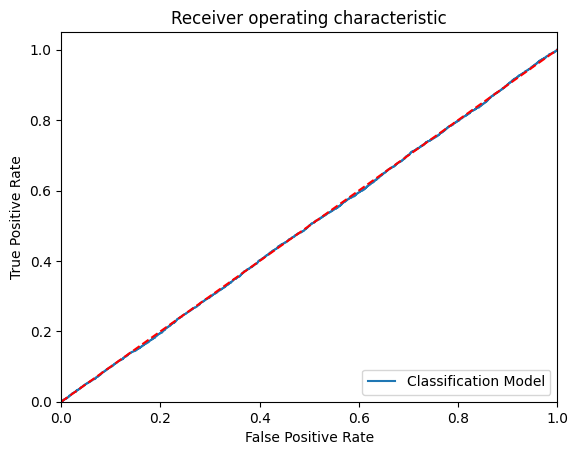

-----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39858, number of negative: 40142
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498225 -> initscore=-0.007100
[LightGBM] [Info] Start training from score -0.007100
Model Name:  LGBMClassifier()
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.44      0.46      9921
           0       0.50      0.56      0.53     10079

    accuracy                          

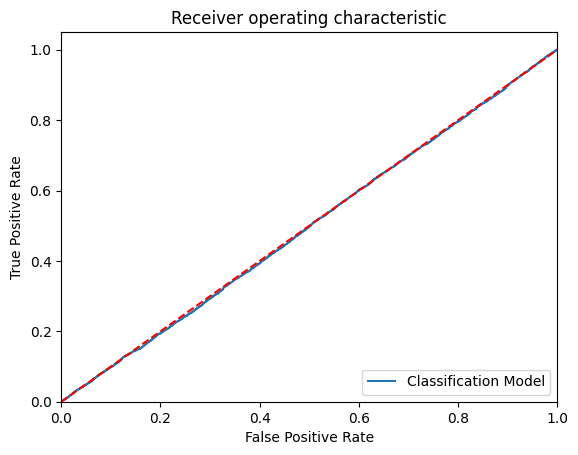

-----------------------------------------------------------------------------------------------------


In [ ]:
CSResults=pd.read_csv(r"/content/crResults - Sheet1.csv")
# Build the Calssification models and compare the results

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier(n_estimators=100)
ModelKNN = KNeighborsClassifier(n_neighbors=10)
ModelGNB = GaussianNB()
ModelXGB = XGBClassifier()
ModelSVM = SVC(kernel='linear',random_state=1,gamma = 'auto',probability=True)
ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelXGB,ModelLGB]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    # actual values
    actual = y_test

    # predicted values
    predicted = y_pred

    # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    # print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy,
              }
    CSResults = CSResults.append(new_row, ignore_index=True)

In [ ]:
CSResults

,Model Name,True_Positive,False_Negative,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False_Positive,F1 Score
0,LogisticRegression(),0,9921,10079,0.504,NaN,0.000,NaN,1.000,NaN,0.500000,0.500,0.0,0.000
1,DecisionTreeClassifier(),4960,4961,5040,0.500,0.496,0.500,NaN,0.500,-0.000,0.500000,0.500,5039.0,0.498
2,"(DecisionTreeClassifier(max_features='sqrt', r...",4716,5205,5167,0.494,0.490,0.475,NaN,0.513,-0.012,0.494003,0.494,4912.0,0.482
3,"(ExtraTreeClassifier(random_state=1703605640),...",4731,5190,5175,0.495,0.491,0.477,NaN,0.513,-0.010,0.495156,0.495,4904.0,0.484
4,KNeighborsClassifier(n_neighbors=10),3610,6311,6319,0.496,0.490,0.364,NaN,0.627,-0.010,0.495411,0.496,3760.0,0.418
5,GaussianNB(),3952,5969,6141,0.505,0.501,0.398,NaN,0.609,0.008,0.503817,0.504,3938.0,0.444
6,"XGBClassifier(base_score=None, booster=None, c...",4849,5072,5127,0.499,0.495,0.489,NaN,0.509,-0.003,0.498721,0.499,4952.0,0.492
7,LGBMClassifier(),4320,5601,5621,0.497,0.492,0.435,NaN,0.558,-0.007,0.496567,0.497,4458.0,0.462


In [ ]:
#recursive feature elimination technique
from sklearn.feature_selection import RFE
from sklearn import tree

DT=RandomForestClassifier(random_state=42)

rfe_DT=RFE(DT,n_features_to_select=5,verbose=21)

rfe_DT.fit(x_train,y_train)

names=x_train.columns.tolist()

b=rfe_DT.ranking_

#RFE: Recursive Feature Elimination is corresponding to Machine Learning Model.
#ranking is a attribute

a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])

#a.to_csv('feature_selection.csv')

RFE_selected=a['features'][a['rank']==1]

RFE_selected

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


0                           Age
1                   Gender_Male
2                  Monthly_Bill
3    Subscription_Length_Months
4                Total_Usage_GB
Name: features, dtype: object

In [ ]:
x_train=x_train[RFE_selected]
x_test=x_test[RFE_selected]

# Assessing the model with StatsModels

In [ ]:
col = RFE_selected
X_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                80000
Model:                            GLM   Df Residuals:                    79994
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55450.
Date:                Fri, 25 Aug 2023   Deviance:                   1.1090e+05
Time:                        04:14:02   Pearson chi2:                 8.00e+04
No. Iterations:                     3   Pseudo R-squ. (CS):          4.310e-05
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0143      0.027     -0.522      0.602      -0.068       0.039
Age                            0.0330      0.024      1.373      0.170      -0.014       0.080
Gender_Male                    0.0131      0.014      0.923      0.356      -0.015       0.041
Monthly_Bill                  -0.0104      0.024     -0.426      0.670      -0.058       0.038
Subscription_Length_Months     0.0005      0.024      0.022      0.982      -0.046       0.047
Total_Usage_GB              -3.95e-05   5.42e-05     -0.729      0.466      -0.000    6.67e-05
==============================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

75220    0.498109
48955    0.497105
44966    0.504499
13568    0.498141
92727    0.499265
51349    0.493336
86979    0.500519
3806     0.495956
91822    0.498288
6006     0.493247
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.4981091 , 0.49710503, 0.50449862, 0.49814101, 0.4992646 ,
       0.49333552, 0.50051874, 0.49595606, 0.49828846, 0.49324676])

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.498109,75220
1,1,0.497105,48955
2,1,0.504499,44966
3,1,0.498141,13568
4,1,0.499265,92727


In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,1,0.498109,75220,0
1,1,0.497105,48955,0
2,1,0.504499,44966,1
3,1,0.498141,13568,0
4,1,0.499265,92727,0


In [ ]:
# Confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[27971 12171]
 [27537 12321]]


In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.50365


# Checking VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Total_Usage_GB,3.85
2,Monthly_Bill,3.22
0,Age,3.15
3,Subscription_Length_Months,3.06
1,Gender_Male,1.86


In [ ]:
X_train_sm = sm.add_constant(x_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                80000
Model:                            GLM   Df Residuals:                    79994
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55450.
Date:                Fri, 25 Aug 2023   Deviance:                   1.1090e+05
Time:                        04:16:29   Pearson chi2:                 8.00e+04
No. Iterations:                     3   Pseudo R-squ. (CS):          4.310e-05
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0143      0.027     -0.522      0.602      -0.068       0.039
Age                            0.0330      0.024      1.373      0.170      -0.014       0.080
Gender_Male                    0.0131      0.014      0.923      0.356      -0.015       0.041
Monthly_Bill                  -0.0104      0.024     -0.426      0.670      -0.058       0.038
Subscription_Length_Months     0.0005      0.024      0.022      0.982      -0.046       0.047
Total_Usage_GB              -3.95e-05   5.42e-05     -0.729      0.466      -0.000    6.67e-05
==============================================================================================
"""

In [ ]:
col = list(col)
col.remove('Subscription_Length_Months')
col

['Age', 'Gender_Male', 'Monthly_Bill', 'Total_Usage_GB']

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(x_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                80000
Model:                            GLM   Df Residuals:                    79995
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55450.
Date:                Fri, 25 Aug 2023   Deviance:                   1.1090e+05
Time:                        04:19:09   Pearson chi2:                 8.00e+04
No. Iterations:                     3   Pseudo R-squ. (CS):          4.309e-05
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0141      0.025     -0.568      0.570      -0.063       0.034
Age                0.0330      0.024      1.373      0.170      -0.014       0.080
Gender_Male        0.0131      0.014      0.923      0.356      -0.015       0.041
Monthly_Bill      -0.0104      0.024     -0.426      0.670      -0.058       0.038
Total_Usage_GB  -3.95e-05   5.42e-05     -0.729      0.466      -0.000    6.67e-05
==================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Churn_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.503925


In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Total_Usage_GB,3.49
2,Monthly_Bill,3.04
0,Age,2.98
1,Gender_Male,1.83


# Cross Validation

In [ ]:
col = ['Age', 'Gender_Male', 'Monthly_Bill', 'Total_Usage_GB']

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = train[col]
y = train['Churn']  # Binary labels

classifier = RandomForestClassifier()

# Set up k-fold cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation results
for fold_num, accuracy in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {accuracy:.4f}")

print(f"Mean Accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard Deviation: {np.std(cross_val_scores):.4f}")


Fold 1: Accuracy = 0.4990
Fold 2: Accuracy = 0.4995
Fold 3: Accuracy = 0.5080
Fold 4: Accuracy = 0.5005
Fold 5: Accuracy = 0.5033
Fold 6: Accuracy = 0.5071
Fold 7: Accuracy = 0.4968
Fold 8: Accuracy = 0.5067
Fold 9: Accuracy = 0.4999
Fold 10: Accuracy = 0.5027
Mean Accuracy: 0.5023
Standard Deviation: 0.0037


In [20]:

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier(n_estimators=100)
ModelKNN = KNeighborsClassifier(n_neighbors=10)
ModelGNB = GaussianNB()
ModelXGB = XGBClassifier()
ModelSVM = SVC(kernel='linear',random_state=1,gamma = 'auto',probability=True)
ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelXGB,ModelLGB]
X = train[col]
y = train['Churn']
for models in MM:

    # Fit the model
    # Set up stratified k-fold cross-validation
    print('Model Name: ', models)
    classifier = models
    num_folds = 5  # You can change this to the desired number of folds
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Perform cross-validation
    cross_val_scores = cross_val_score(classifier, X, y, cv=skf, scoring='accuracy')

    # Print the cross-validation results
    for fold_num, accuracy in enumerate(cross_val_scores, start=1):
        print(f"Fold {fold_num}: Accuracy = {accuracy:.4f}")

    print(f"Mean Accuracy: {np.mean(cross_val_scores):.4f}")
    print(f"Standard Deviation: {np.std(cross_val_scores):.4f}")





Model Name:  LogisticRegression()
Fold 1: Accuracy = 0.5032
Fold 2: Accuracy = 0.5020
Fold 3: Accuracy = 0.5006
Fold 4: Accuracy = 0.5000
Fold 5: Accuracy = 0.5014
Mean Accuracy: 0.5014
Standard Deviation: 0.0011
Model Name:  DecisionTreeClassifier()
Fold 1: Accuracy = 0.5007
Fold 2: Accuracy = 0.5013
Fold 3: Accuracy = 0.4977
Fold 4: Accuracy = 0.4977
Fold 5: Accuracy = 0.5013
Mean Accuracy: 0.4998
Standard Deviation: 0.0017
Model Name:  RandomForestClassifier()
Fold 1: Accuracy = 0.5018
Fold 2: Accuracy = 0.4982
Fold 3: Accuracy = 0.5071
Fold 4: Accuracy = 0.5052
Fold 5: Accuracy = 0.5018
Mean Accuracy: 0.5028
Standard Deviation: 0.0031
Model Name:  ExtraTreesClassifier()
Fold 1: Accuracy = 0.5035
Fold 2: Accuracy = 0.4994
Fold 3: Accuracy = 0.5055
Fold 4: Accuracy = 0.5036
Fold 5: Accuracy = 0.5030
Mean Accuracy: 0.5030
Standard Deviation: 0.0020
Model Name:  KNeighborsClassifier(n_neighbors=10)
Fold 1: Accuracy = 0.5000
Fold 2: Accuracy = 0.5053
Fold 3: Accuracy = 0.5079
Fold 4: Ac

# Performing model training by using Deep Learning Models

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset file

# Separate features and target
X = train.drop(['Churn'],axis=1)
y = train['Churn']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a simple feedforward neural network
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/10
2000/2000 [==============================] - 14s 4ms/step - loss: 69.5099 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 2/10
2000/2000 [==============================] - 9s 4ms/step - loss: 0.8962 - accuracy: 0.5043 - val_loss: 0.6933 - val_accuracy: 0.4961
Epoch 3/10
2000/2000 [==============================] - 13s 7ms/step - loss: 0.7398 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 4/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.7101 - accuracy: 0.5018 - val_loss: 0.6933 - val_accuracy: 0.4961
Epoch 5/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.7051 - accuracy: 0.5008 - val_loss: 0.6933 - val_accuracy: 0.4961
Epoch 6/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.7079 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 7/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.6979 - accuracy: 0.5041 - val_loss: 0.6933 - val_accura

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow.keras import layers, models

X = train.drop(['Churn'],axis=1)
y = train['Churn']

# Create a simple feedforward neural network
def create_model():
    model = models.Sequential([
        layers.Input(shape=(X.shape[1],)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set up stratified k-fold cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
fold_accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_model()
    model.fit(X_train, y_train, epochs=15, batch_size=100, validation_data=(X_test, y_test))

    _, accuracy = model.evaluate(X_test, y_test)
    fold_accuracies.append(accuracy)

mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation: {std_accuracy:.4f}")


Epoch 1/15
800/800 [==============================] - 6s 5ms/step - loss: 82.1305 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 2/15
800/800 [==============================] - 3s 3ms/step - loss: 1.0380 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.5023
Epoch 3/15
800/800 [==============================] - 4s 5ms/step - loss: 0.8228 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 4/15
800/800 [==============================] - 4s 5ms/step - loss: 0.7672 - accuracy: 0.5019 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 5/15
800/800 [==============================] - 4s 6ms/step - loss: 0.7091 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 6/15
800/800 [==============================] - 3s 4ms/step - loss: 0.7046 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 7/15
800/800 [==============================] - 3s 4ms/step - loss: 0.7163 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = train[col]
y = train['Churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
num_components = 3  # Choose the number of components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier on the reduced-dimensional data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.4999


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

X = train.drop(['Churn'],axis=1)
y = train['Churn']

# Create a simple RNN architecture
def create_model():
    model = models.Sequential([
        layers.Input(shape=(X.shape[1],)),
        layers.Reshape((X.shape[1], 1)),
        layers.SimpleRNN(64, activation='relu', recurrent_dropout=0.2, dropout=0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set up stratified k-fold cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
fold_accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_model()
    model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test))

    _, accuracy = model.evaluate(X_test, y_test)
    fold_accuracies.append(accuracy)

mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation: {std_accuracy:.4f}")


Epoch 1/20
800/800 [==============================] - 8s 7ms/step - loss: 15.9731 - accuracy: 0.4999 - val_loss: 0.7456 - val_accuracy: 0.5036
Epoch 2/20
800/800 [==============================] - 5s 6ms/step - loss: 1.0788 - accuracy: 0.4990 - val_loss: 0.7062 - val_accuracy: 0.5040
Epoch 3/20
800/800 [==============================] - 5s 6ms/step - loss: 0.7731 - accuracy: 0.5013 - val_loss: 0.6933 - val_accuracy: 0.4957
Epoch 4/20
800/800 [==============================] - 5s 6ms/step - loss: 0.7340 - accuracy: 0.4977 - val_loss: 0.7541 - val_accuracy: 0.5023
Epoch 5/20
800/800 [==============================] - 4s 5ms/step - loss: 0.7172 - accuracy: 0.4997 - val_loss: 0.7381 - val_accuracy: 0.5023
Epoch 6/20
800/800 [==============================] - 4s 6ms/step - loss: 0.7157 - accuracy: 0.4976 - val_loss: 0.6932 - val_accuracy: 0.5061
Epoch 7/20
800/800 [==============================] - 5s 6ms/step - loss: 0.7120 - accuracy: 0.5017 - val_loss: 0.6992 - val_accuracy: 0.4978
Epoch

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression  # Replace with your preferred classifier

X = train.drop(['Churn'],axis=1)  # 100 samples, 10 features
y = train['Churn']  # Binary labels

# Create a classifier (replace this with your preferred classifier)
classifier = RandomForestClassifier()

# Set up stratified k-fold cross-validation
num_folds = 10  # You can change this to the desired number of folds
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(classifier, X, y, cv=skf, scoring='accuracy')

# Print the cross-validation results
for fold_num, accuracy in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {accuracy:.4f}")

print(f"Mean Accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard Deviation: {np.std(cross_val_scores):.4f}")


Fold 1: Accuracy = 0.4952
Fold 2: Accuracy = 0.5001
Fold 3: Accuracy = 0.5002
Fold 4: Accuracy = 0.5027
Fold 5: Accuracy = 0.4994
Fold 6: Accuracy = 0.4901
Fold 7: Accuracy = 0.4928
Fold 8: Accuracy = 0.4943
Fold 9: Accuracy = 0.4970
Fold 10: Accuracy = 0.4988
Mean Accuracy: 0.4971
Standard Deviation: 0.0037


# HyperParameter Tuning

In [ ]:
X = train.drop(['Churn','CustomerID'],axis=1)
y = train['Churn']
# Set up stratified k-fold cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
fold_accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]


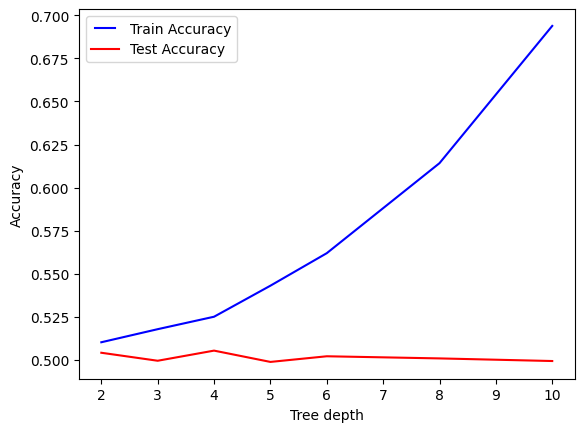

In [ ]:
#How do we arrive at the best tree depth for this data?
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

max_depths = [2,3,4,5,6,8,10]
# max_depths=max_depths.astype('int')
train_results = []
test_results = []

for max_depth in max_depths:
    dt = RandomForestClassifier(max_depth=max_depth)
    dt.fit(x_train, y_train)

    train_pred = dt.predict(x_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(x_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

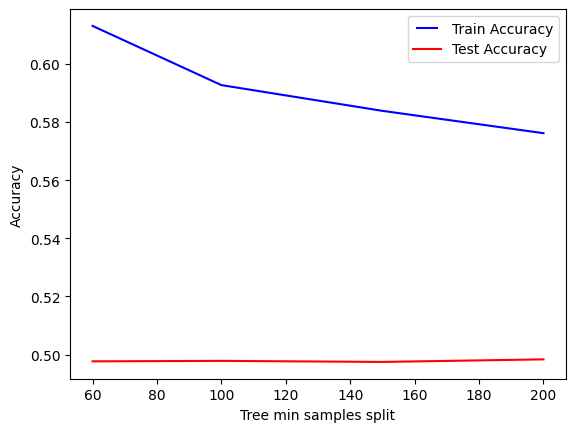

In [ ]:
#How do we arrive at the best tree min_samples_leaf for this data?
#min_samples_leaf = np.linspace(2, 31, 30, endpoint=True)

min_samples_leafs=[60,100,150,200]

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = RandomForestClassifier(min_samples_leaf=min_samples_leaf,max_depth=10)
    dt.fit(x_train, y_train)

    train_pred = dt.predict(x_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(x_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree min samples split')
plt.show()

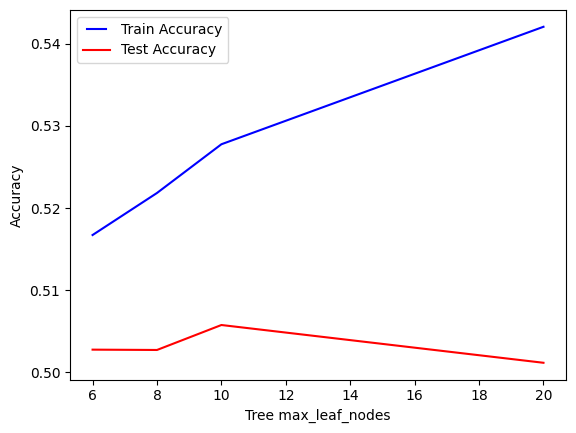

In [ ]:
#How do we arrive at the best tree min_samples_leaf for this data?
#min_samples_leaf = np.linspace(2, 31, 30, endpoint=True)

max_leaf_nodes= [6,8,10,20]

train_results = []
test_results = []

for min_samples_leaf in max_leaf_nodes:
    dt = RandomForestClassifier(max_leaf_nodes=min_samples_leaf,max_depth=10)
    dt.fit(x_train, y_train)

    train_pred = dt.predict(x_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(x_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_leaf_nodes, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_leaf_nodes, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree max_leaf_nodes')
plt.show()

# Final Model

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = train[col]
y = train['Churn']  # Binary labels

classifier = RandomForestClassifier(n_estimators=500,max_depth=15,min_samples_split=5)


# Set up k-fold cross-validation
num_folds = 10
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(classifier, X, y, cv=skf, scoring='accuracy')

# Print the cross-validation results
for fold_num, accuracy in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {accuracy:.4f}")

print(f"Mean Accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard Deviation: {np.std(cross_val_scores):.4f}")


Fold 1: Accuracy = 0.5057
Fold 2: Accuracy = 0.4988
Fold 3: Accuracy = 0.4960
Fold 4: Accuracy = 0.5045
Fold 5: Accuracy = 0.5041
Fold 6: Accuracy = 0.5040
Fold 7: Accuracy = 0.5029
Fold 8: Accuracy = 0.5036
Fold 9: Accuracy = 0.4975
Fold 10: Accuracy = 0.5030
Mean Accuracy: 0.5020
Standard Deviation: 0.0031
